In [ ]:
!pip install transformers
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 13.8 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 455, in run
    installed = install_given_reqs(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/__init__.py", line 70, in install_given_reqs
    requirement.install(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_install.py", line 851, in install
    install_wheel(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/operations/install/wheel.py", line 726, in install_wheel
    _install_wheel(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/ope

In [ ]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 47.7 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from datasets import load_dataset
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import torch

In [ ]:
ds = load_dataset("graphs-datasets/PROTEINS")

In [ ]:
print(ds)
print(ds['train'][0])  # View the first sample in the training set


DatasetDict({
    train: Dataset({
        features: ['edge_index', 'node_feat', 'y', 'num_nodes'],
        num_rows: 1113
    })
})
{'edge_index': [[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 41, 41, 41, 41, 41, 41], [11, 22, 32, 23, 31, 41, 24, 29, 34, 4, 28, 29, 38, 39, 3, 14, 28, 29, 38, 39, 6, 7, 26, 5, 7, 8, 5, 6, 19, 25, 6, 9, 10, 25, 35, 8, 10, 19, 21, 25, 35, 8, 9, 20, 0, 22, 32, 31, 33, 41, 14, 15, 34, 39, 4, 13, 15, 39, 13, 14, 38, 17, 18, 19, 3

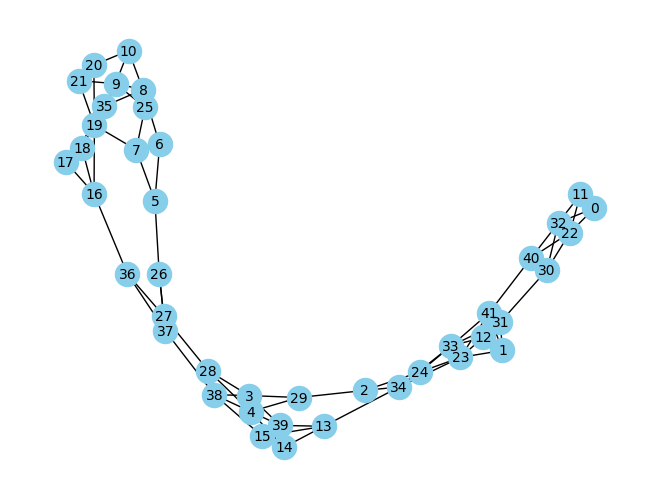

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(edge_index, num_nodes):
    G = nx.Graph()
    G.add_edges_from(list(zip(edge_index[0], edge_index[1])))

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=300, node_color="skyblue", font_size=10, font_color="black")
    plt.show()

# Visualize the first graph in the dataset
sample_graph = ds['train'][0]
visualize_graph(sample_graph['edge_index'], sample_graph['num_nodes'])


In [ ]:
import torch

# Example to convert the edge_index and node_feat into tensors
def preprocess_graph_data(sample):
    edge_index = torch.tensor(sample['edge_index'], dtype=torch.long)
    node_feat = torch.tensor(sample['node_feat'], dtype=torch.float)
    label = torch.tensor(sample['y'], dtype=torch.long)
    return edge_index, node_feat, label

# Apply the preprocessing on one sample
edge_index, node_feat, label = preprocess_graph_data(ds['train'][0])
print(edge_index)
print(node_feat)
print(label)


tensor([[ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  4,  4,
          4,  4,  5,  5,  5,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,
          9,  9,  9,  9,  9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13,
         14, 14, 14, 14, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 18, 18, 18, 18,
         19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 22,
         23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28,
         28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32,
         33, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 37, 37,
         37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 41, 41, 41, 41, 41, 41],
        [11, 22, 32, 23, 31, 41, 24, 29, 34,  4, 28, 29, 38, 39,  3, 14, 28, 29,
         38, 39,  6,  7, 26,  5,  7,  8,  5,  6, 19, 25,  6,  9, 10, 25, 35,  8,
         10, 19, 21, 25, 35,  8,  9, 20,  0, 22, 32, 31, 33, 41, 14, 15, 34, 39,
          4, 13, 15, 39, 13

In [ ]:
train_test_split = ds['train'].train_test_split(test_size=0.2)
train_dataset = train_test_split['train']
test_dataset = train_test_split['test']


In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.8 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool

# Define the GCN model with global mean pooling per graph
class GCN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.fc = nn.Linear(hidden_channels, num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = global_mean_pool(x, batch)  # Pool each graph's node features
        x = self.fc(x)
        return F.log_softmax(x, dim=-1)




In [ ]:
from torch_geometric.data import Data, DataLoader

# Function to convert a single graph to PyTorch Geometric format
def convert_to_pyg_format(edge_index, node_feat, label):
    edge_index = torch.tensor(edge_index, dtype=torch.long)
    node_feat = torch.tensor(node_feat, dtype=torch.float)
    label = torch.tensor(label, dtype=torch.long)
    return Data(x=node_feat, edge_index=edge_index, y=label)

# Convert the dataset to PyTorch Geometric format
train_data_list = []
for i in range(len(train_dataset)):
    sample = train_dataset[i]
    graph = convert_to_pyg_format(sample['edge_index'], sample['node_feat'], sample['y'])
    train_data_list.append(graph)

test_data_list = []
for i in range(len(test_dataset)):
    sample = test_dataset[i]
    graph = convert_to_pyg_format(sample['edge_index'], sample['node_feat'], sample['y'])
    test_data_list.append(graph)

# Create data loaders
train_loader = DataLoader(train_data_list, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data_list, batch_size=64, shuffle=False)


In [ ]:
def train(model, optimizer, data_loader):
    model.train()
    total_loss = 0
    for data in data_loader:
        optimizer.zero_grad()
        # Pass x, edge_index, and batch to the model
        out = model(data.x, data.edge_index, data.batch)
        loss = F.nll_loss(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

def test(model, data_loader):
    model.eval()
    correct = 0
    for data in data_loader:
        out = model(data.x, data.edge_index, data.batch)  # Pass batch as well
        pred = out.argmax(dim=1)
        correct += (pred == data.y).sum().item()
    return correct / len(data_loader.dataset)

# Initialize the model, optimizer, and loss function
num_node_features = train_data_list[0].x.shape[1]  # Number of node features
hidden_channels = 256  # You can tune this
num_classes = len(set([d.y.item() for d in train_data_list]))  # Number of classes

model = GCN(num_node_features, hidden_channels, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Train and evaluate the model
num_epochs = 100
for epoch in range(1, num_epochs+1):
    loss = train(model, optimizer, train_loader)
    train_acc = test(model, train_loader)
    test_acc = test(model, test_loader)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')


Epoch: 001, Loss: 0.6792, Train Acc: 0.6101, Test Acc: 0.5381
Epoch: 002, Loss: 0.6663, Train Acc: 0.6101, Test Acc: 0.5381
Epoch: 003, Loss: 0.6593, Train Acc: 0.6461, Test Acc: 0.5964
Epoch: 004, Loss: 0.6482, Train Acc: 0.6382, Test Acc: 0.5785
Epoch: 005, Loss: 0.6284, Train Acc: 0.6404, Test Acc: 0.5785
Epoch: 006, Loss: 0.6459, Train Acc: 0.6584, Test Acc: 0.6233
Epoch: 007, Loss: 0.6361, Train Acc: 0.6449, Test Acc: 0.5830
Epoch: 008, Loss: 0.6289, Train Acc: 0.7157, Test Acc: 0.7085
Epoch: 009, Loss: 0.6226, Train Acc: 0.7011, Test Acc: 0.6951
Epoch: 010, Loss: 0.6247, Train Acc: 0.6618, Test Acc: 0.6592
Epoch: 011, Loss: 0.6143, Train Acc: 0.6764, Test Acc: 0.6413
Epoch: 012, Loss: 0.6326, Train Acc: 0.6955, Test Acc: 0.6771
Epoch: 013, Loss: 0.6197, Train Acc: 0.6697, Test Acc: 0.6233
Epoch: 014, Loss: 0.6275, Train Acc: 0.6820, Test Acc: 0.6502
Epoch: 015, Loss: 0.6103, Train Acc: 0.7247, Test Acc: 0.7040
Epoch: 016, Loss: 0.6089, Train Acc: 0.7225, Test Acc: 0.6996
Epoch: 0

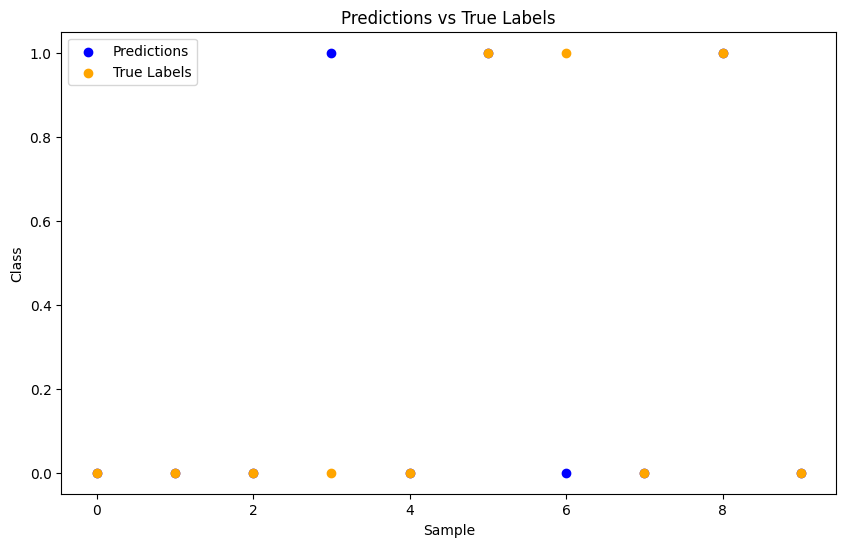

In [ ]:
import matplotlib.pyplot as plt

def visualize_predictions(model, data_loader, num_samples=10):
    model.eval()
    predictions = []
    true_labels = []

    # Collect predictions and true labels
    for data in data_loader:
        out = model(data.x, data.edge_index, data.batch)
        pred = out.argmax(dim=1)
        predictions.extend(pred.cpu().numpy())
        true_labels.extend(data.y.cpu().numpy())

    # Plot predictions vs true labels for a few samples
    plt.figure(figsize=(10, 6))
    plt.scatter(range(num_samples), predictions[:num_samples], label="Predictions", color='blue')
    plt.scatter(range(num_samples), true_labels[:num_samples], label="True Labels", color='orange')
    plt.title("Predictions vs True Labels")
    plt.xlabel("Sample")
    plt.ylabel("Class")
    plt.legend()
    plt.show()

# Visualize predictions for the test set
visualize_predictions(model, test_loader)


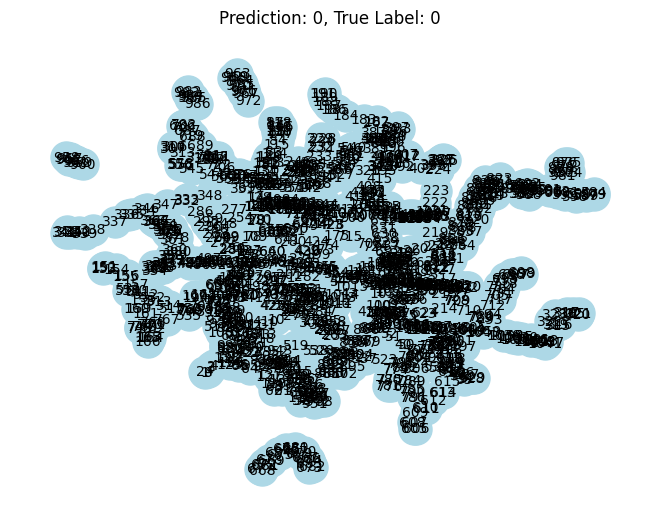

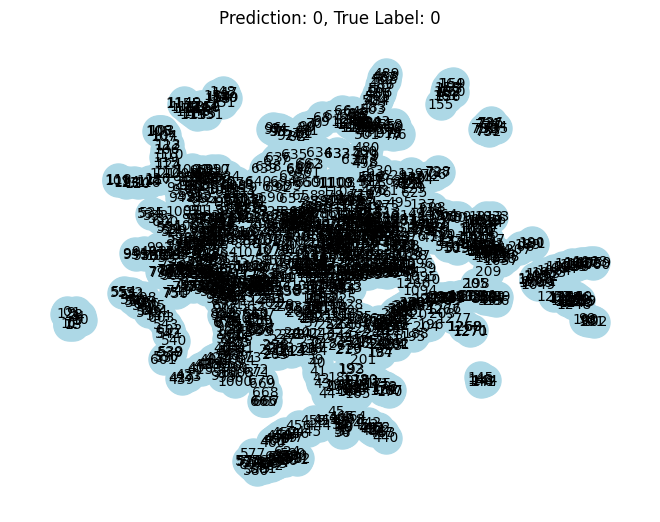

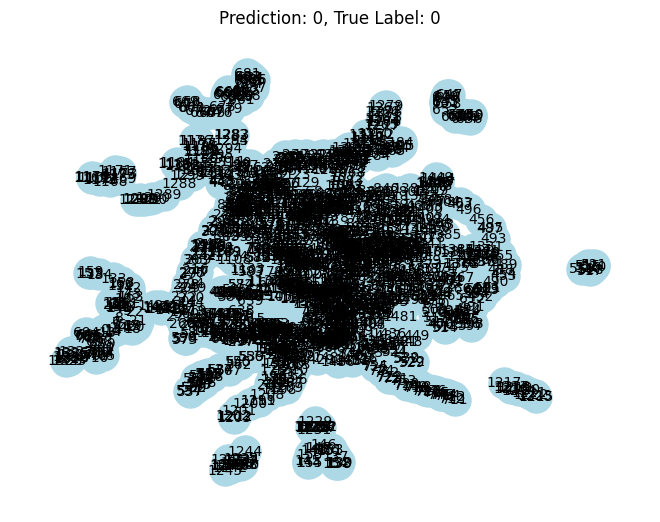

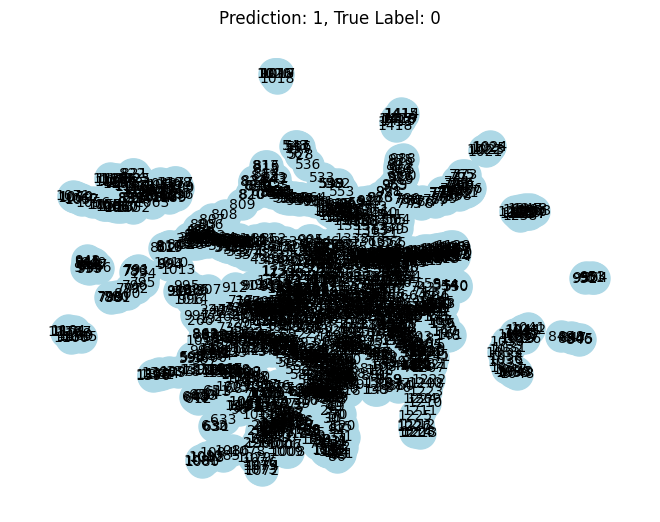

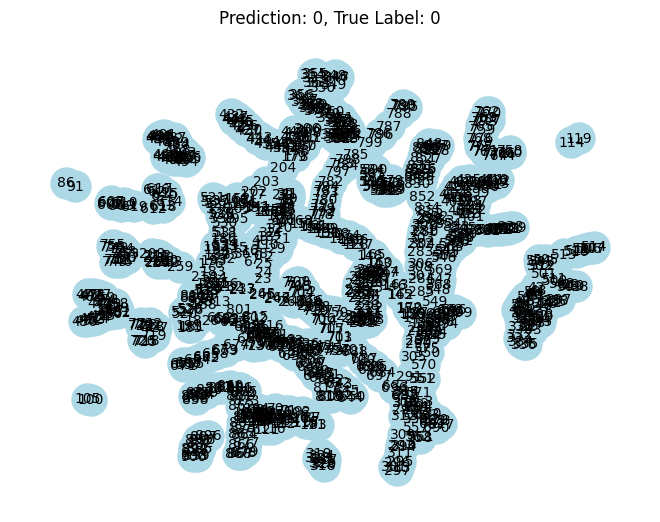

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Visualize graph with node features and prediction/true labels
def visualize_graph_with_structure(data, pred, true_label):
    G = nx.Graph()
    edge_index = data.edge_index.cpu().numpy()
    G.add_edges_from(list(zip(edge_index[0], edge_index[1])))

    # Visualize the node features (if they represent meaningful things like atoms, etc.)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10, font_color="black")

    # Annotate the plot with predicted and true labels
    plt.title(f"Prediction: {pred}, True Label: {true_label}")
    plt.show()

# Visualize a few graphs from the test set along with their predictions
def visualize_test_graph_structures(model, data_loader, num_graphs=5):
    model.eval()
    graphs = []
    preds = []
    true_labels = []

    for data in data_loader:
        out = model(data.x, data.edge_index, data.batch)
        pred = out.argmax(dim=1)
        preds.extend(pred.cpu().numpy())
        true_labels.extend(data.y.cpu().numpy())
        graphs.append(data)
        if len(graphs) >= num_graphs:
            break

    for i in range(num_graphs):
        visualize_graph_with_structure(graphs[i], preds[i], true_labels[i])

# Visualize some test graphs (molecular/protein structures) with predictions
visualize_test_graph_structures(model, test_loader)
